In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [2]:
# Load Dataset
# We'll use a public dataset from UCI SMS Spam Collection
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
df.head()

✅ Dataset Loaded Successfully!
Shape: (5572, 2)


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."



 Class Distribution:
label
ham     4825
spam     747
Name: count, dtype: int64


C:\Users\tejan\AppData\Local\Temp\ipykernel_11200\3647019826.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


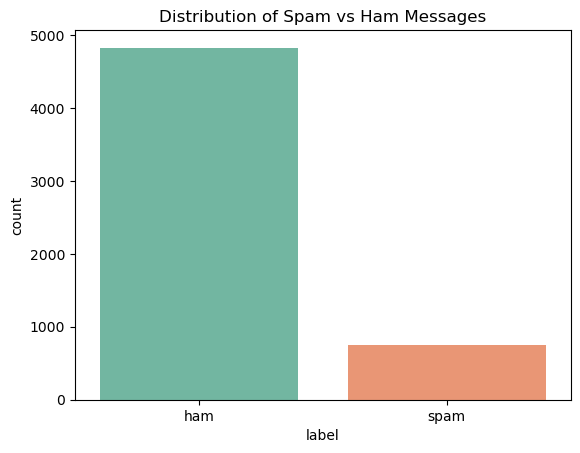

In [3]:
# Data Exploration
print("\n Class Distribution:")
print(df['label'].value_counts())

sns.countplot(x='label', data=df, palette='Set2')
plt.title("Distribution of Spam vs Ham Messages")
plt.show()

In [4]:
# Data Preprocessing
# Convert labels to binary (ham = 0, spam = 1)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Split into features and target
X = df['message']
y = df['label_num']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 4457, Testing samples: 1115


In [5]:
# Text Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF Vectorization complete!")
print("Shape of TF-IDF matrix:", X_train_tfidf.shape)

TF-IDF Vectorization complete!
Shape of TF-IDF matrix: (4457, 7441)


In [6]:
# Train Model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

In [7]:
# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Accuracy: {accuracy:.4f}")

print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n Classification Report:")
print(classification_report(y_test, y_pred))


 Accuracy: 0.9785

 Confusion Matrix:
[[966   0]
 [ 24 125]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



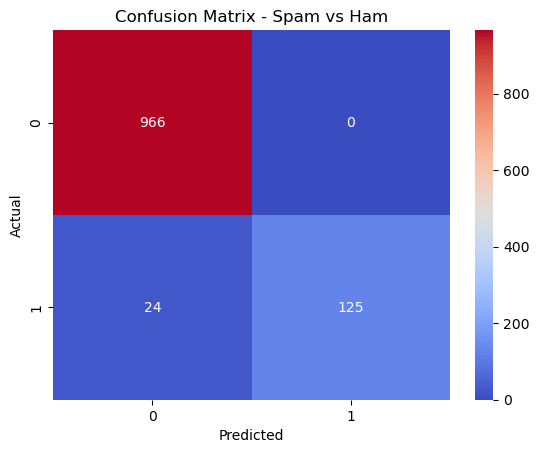

In [8]:
# Visualization
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix - Spam vs Ham")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [9]:
# Test with Custom Input
sample_messages = [
    "Congratulations! You've won a $1000 Walmart gift card. Click here to claim now!",
    "Hey, are we still on for lunch today?",
    "URGENT! Your account has been suspended. Visit link to verify your details."
]

sample_tfidf = vectorizer.transform(sample_messages)
predictions = model.predict(sample_tfidf)

for msg, pred in zip(sample_messages, predictions):
    label = "Spam 🚨" if pred == 1 else "Ham ✅"
    print(f"\nMessage: {msg}\nPrediction: {label}")


Message: Congratulations! You've won a $1000 Walmart gift card. Click here to claim now!
Prediction: Spam 🚨

Message: Hey, are we still on for lunch today?
Prediction: Ham ✅

Message: URGENT! Your account has been suspended. Visit link to verify your details.
Prediction: Ham ✅


In [10]:
# Save Model and Vectorizer
joblib.dump(model, "spam_classifier_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("\n Model and Vectorizer Saved Successfully!")


 Model and Vectorizer Saved Successfully!
